<a href="https://www.kaggle.com/code/doctortorsten/y8tech-forecasts-for-bitcoin?scriptVersionId=117857123" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/yuce-8/public-api-client/blob/main/Public_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About this notebook

this is an enhaced version of the original notebook provided at https://github.com/yuce-8/public-api-client

This client allows you to retrieve the Bitcoin & Ethereum forecasts created by YUCE-8 (aka Y8). Please read the [terms & conditions](https://github.com/yuce-8/public-api-client) before using this code and the related YUCE-8 service.

The live forecasts are displayed at https://www.y8-tech.cloud

# How we forecast the short-term future of stocks & cryptos with AI
The nature of capital markets is determined by ups and downs. Geopolitical effects and investor sentiments influence prices. Today you have access to Terabytes of data in real time. But the human brain is not capable of processing this amount of information. As a result, traders and risk managers get overrun by data. Whilst the human brain gets overrun by the amount of data that is produced per second another technology is waiting for its deployment: AI. AI is able to learn from the past in order to predict the future. But financial data is difficult to predict. Every asset is different and operational success requires experienced traders. Building an AI driven platform requires lots of time, lots of developers and years of patience.

# Historical vs. future data
There vast majority of available datapoints are historical datapoints. Every Terabyte of data was created in history. An analyst needs to access the data, filter the datapoints and finally run the analysis. The result is an individual assessment and mitigation of investment consequences. We call that future data. Every farmer knows that the best time to get seeds in the ground is when the soil is relatively dry, but right before a good soaking rain. Competition exists in agriculture, too. If farmers were today's investors every farmer would collect datapoints such as air pressure or humidity to calculate his own probability of a rainy tomorrow. And then they would wonder, why the big farmers are always winning with their AI.

# About Y8
Y8 has built several AI models that predict the most likely future of various assets on a 24/7 basis. The main input parameters are market data, technical analysis data, asset specific data (such as blockchain data) and a secret sauce. The models are continuously improved and back tested.

# Findings
The day-to-day trading market is driven by approx. 70% algorithmic trading. In 2020 Citadel said, that retail is 25% during peaks. Both participants leave traces in historical data. These traces explain how and when most market participants reacted to certain data points in the past. The sum of these traces is a â€œhiddenâ€ script, that was written with invisible ink. Y8 aims to reveal these messages. Y8 has different models for the same asset. An algorithm chooses the right model for the right situation. A situation is determined by several parameters such as regime class and volatility. Let's have a look at a specific model trained for QQQ and 4-hour time periods. Y8 always forecasts 13 future data points. The black dots are the real changes from one 4-hour candle to the next. The blue dots are the forecasted minimum changes by Y8. Here's a scatter plot of real price changes for timestep +3 in a back testing scenario where Y8 didn't know what's coming next. 74% of all blue dots (= forecasted price changes for this future timestep) are above / below 1 when the black dots (= real price changes) are above / below 1. That means, that in 74% of all cases QQQ closed higher 3 timesteps later when the forecast predicted a bullish scenario. In 36% of these back tested cases the Y8 prediction was wrong.

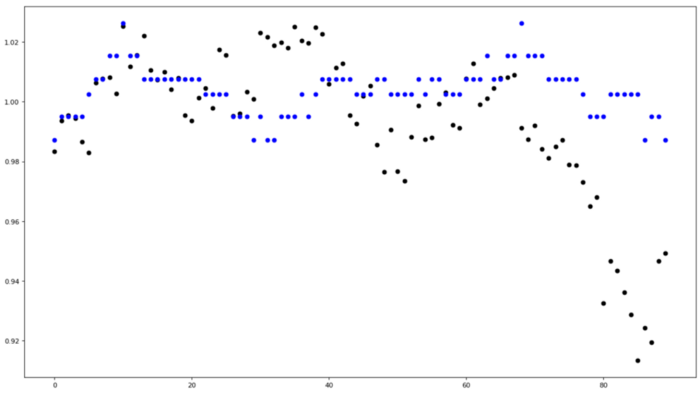


# How to read the Y8 forecasts
Y8 forecasts look like this one: the forecast of BTCUSD starts with the vertical grey bar on the 28th of January.

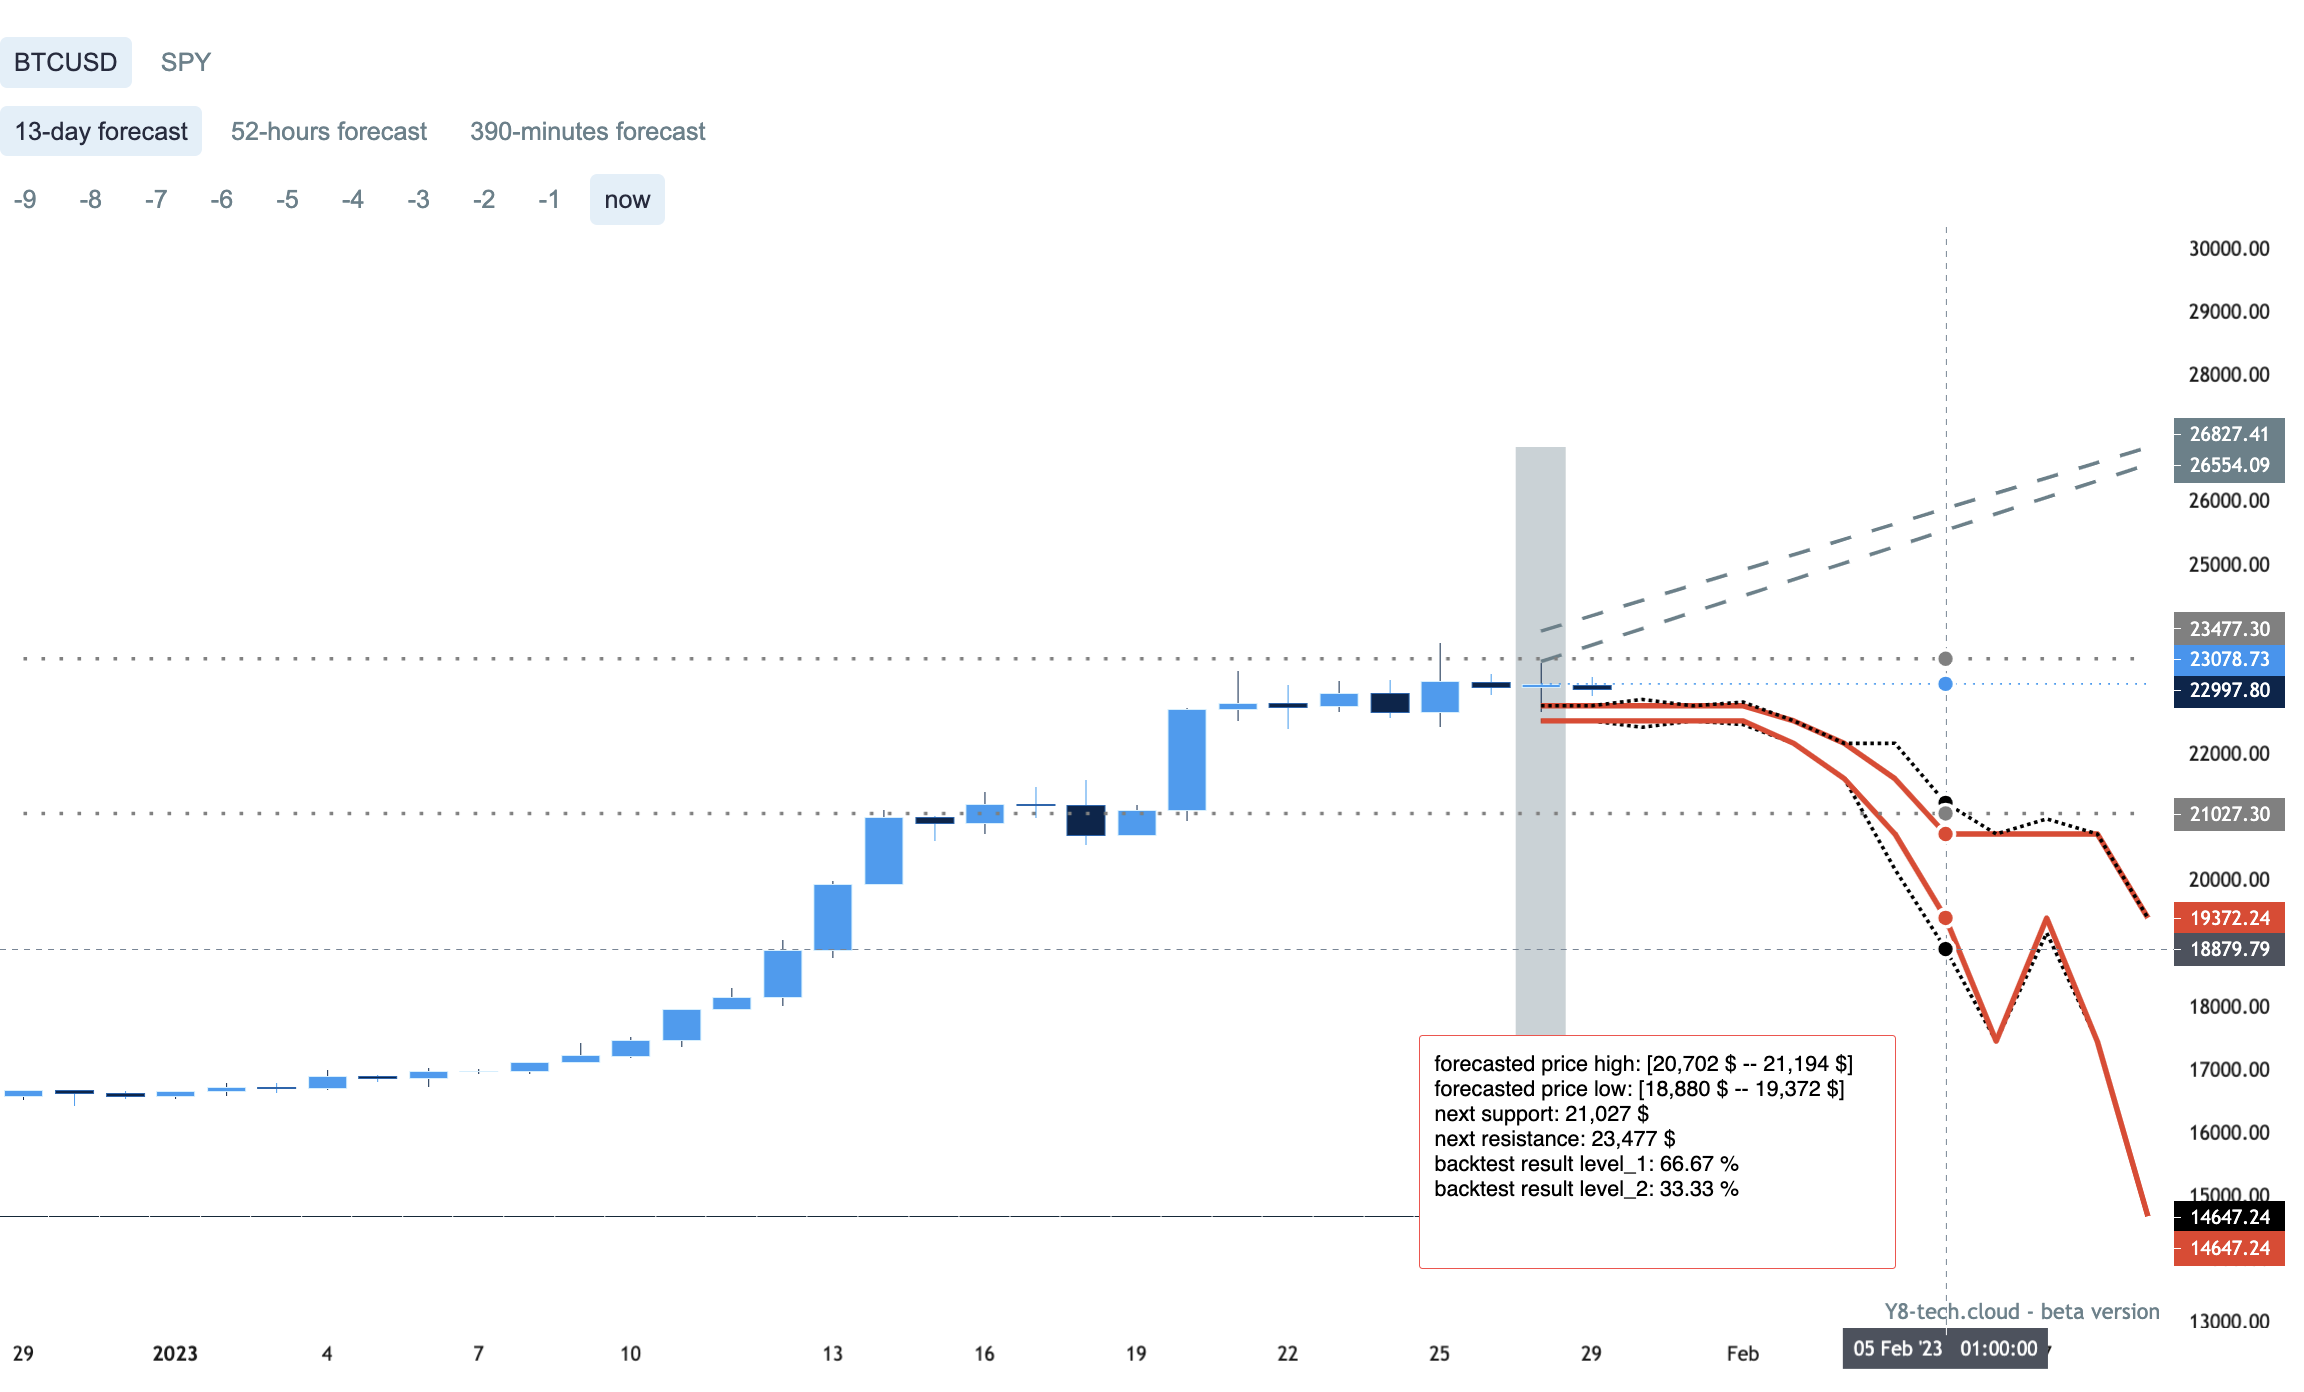

Within a forecast we can see a maximum of 8 datapoints:
* the current short-term trendlines: these two lines represent the current short-term trend.
* the forecasted price ranges: these 4 datapoints represent the channel of the forecasted future price development. In this case the AI forecast predicts a maximum price of BTCUSD between 20,702$ and 21,194$ by Feb 5th. And it predicts a minum price range between 18,880$ and 19,372$ on the same day.
* the next support & resistance: these 2 datapoints represent the calculated next support and resistance level.

Now, how accurate is a forecast? The short answer: there 's no guarantee. The only thing we can do is to measure the success of the previous forecasts. Y8 displays the back-tested results of the model that was used to predict the future of the selected asset. Two levels of accuracy displayed:
* level 1: level 1 is the directional accuracy of the back-test results. The back-testing algorithm will match the forecasted price of say t=-189, t=-188, â€¦ with the real closing prices. If for example the forecast at t=-70 predicts a lower future price range and the real closing price of t=-60 and the forecasted closing price of t=-60 is lower than the price of t=-70, then "timestep +10" will receive 1 point. In this case the level 1 accuracy is 66.67%. And in this case the model used to predict the future BTCUSD price forecasted the negative price development of the 10th day correctly.
* level 2: level 2 is the 85% price accuracy. If level 1 predicted the right direction of the future price development, then level 2 receives 1 point if the forecasted price reaches at least 85% of the predicted future price. In this case the level 2 accuracy of the 10th day is 33.33%.

The following image shows a historical forecast. As you can see the real 4-hour candles of SPY moved perfectly within the forecasted price range of Jan 23rd
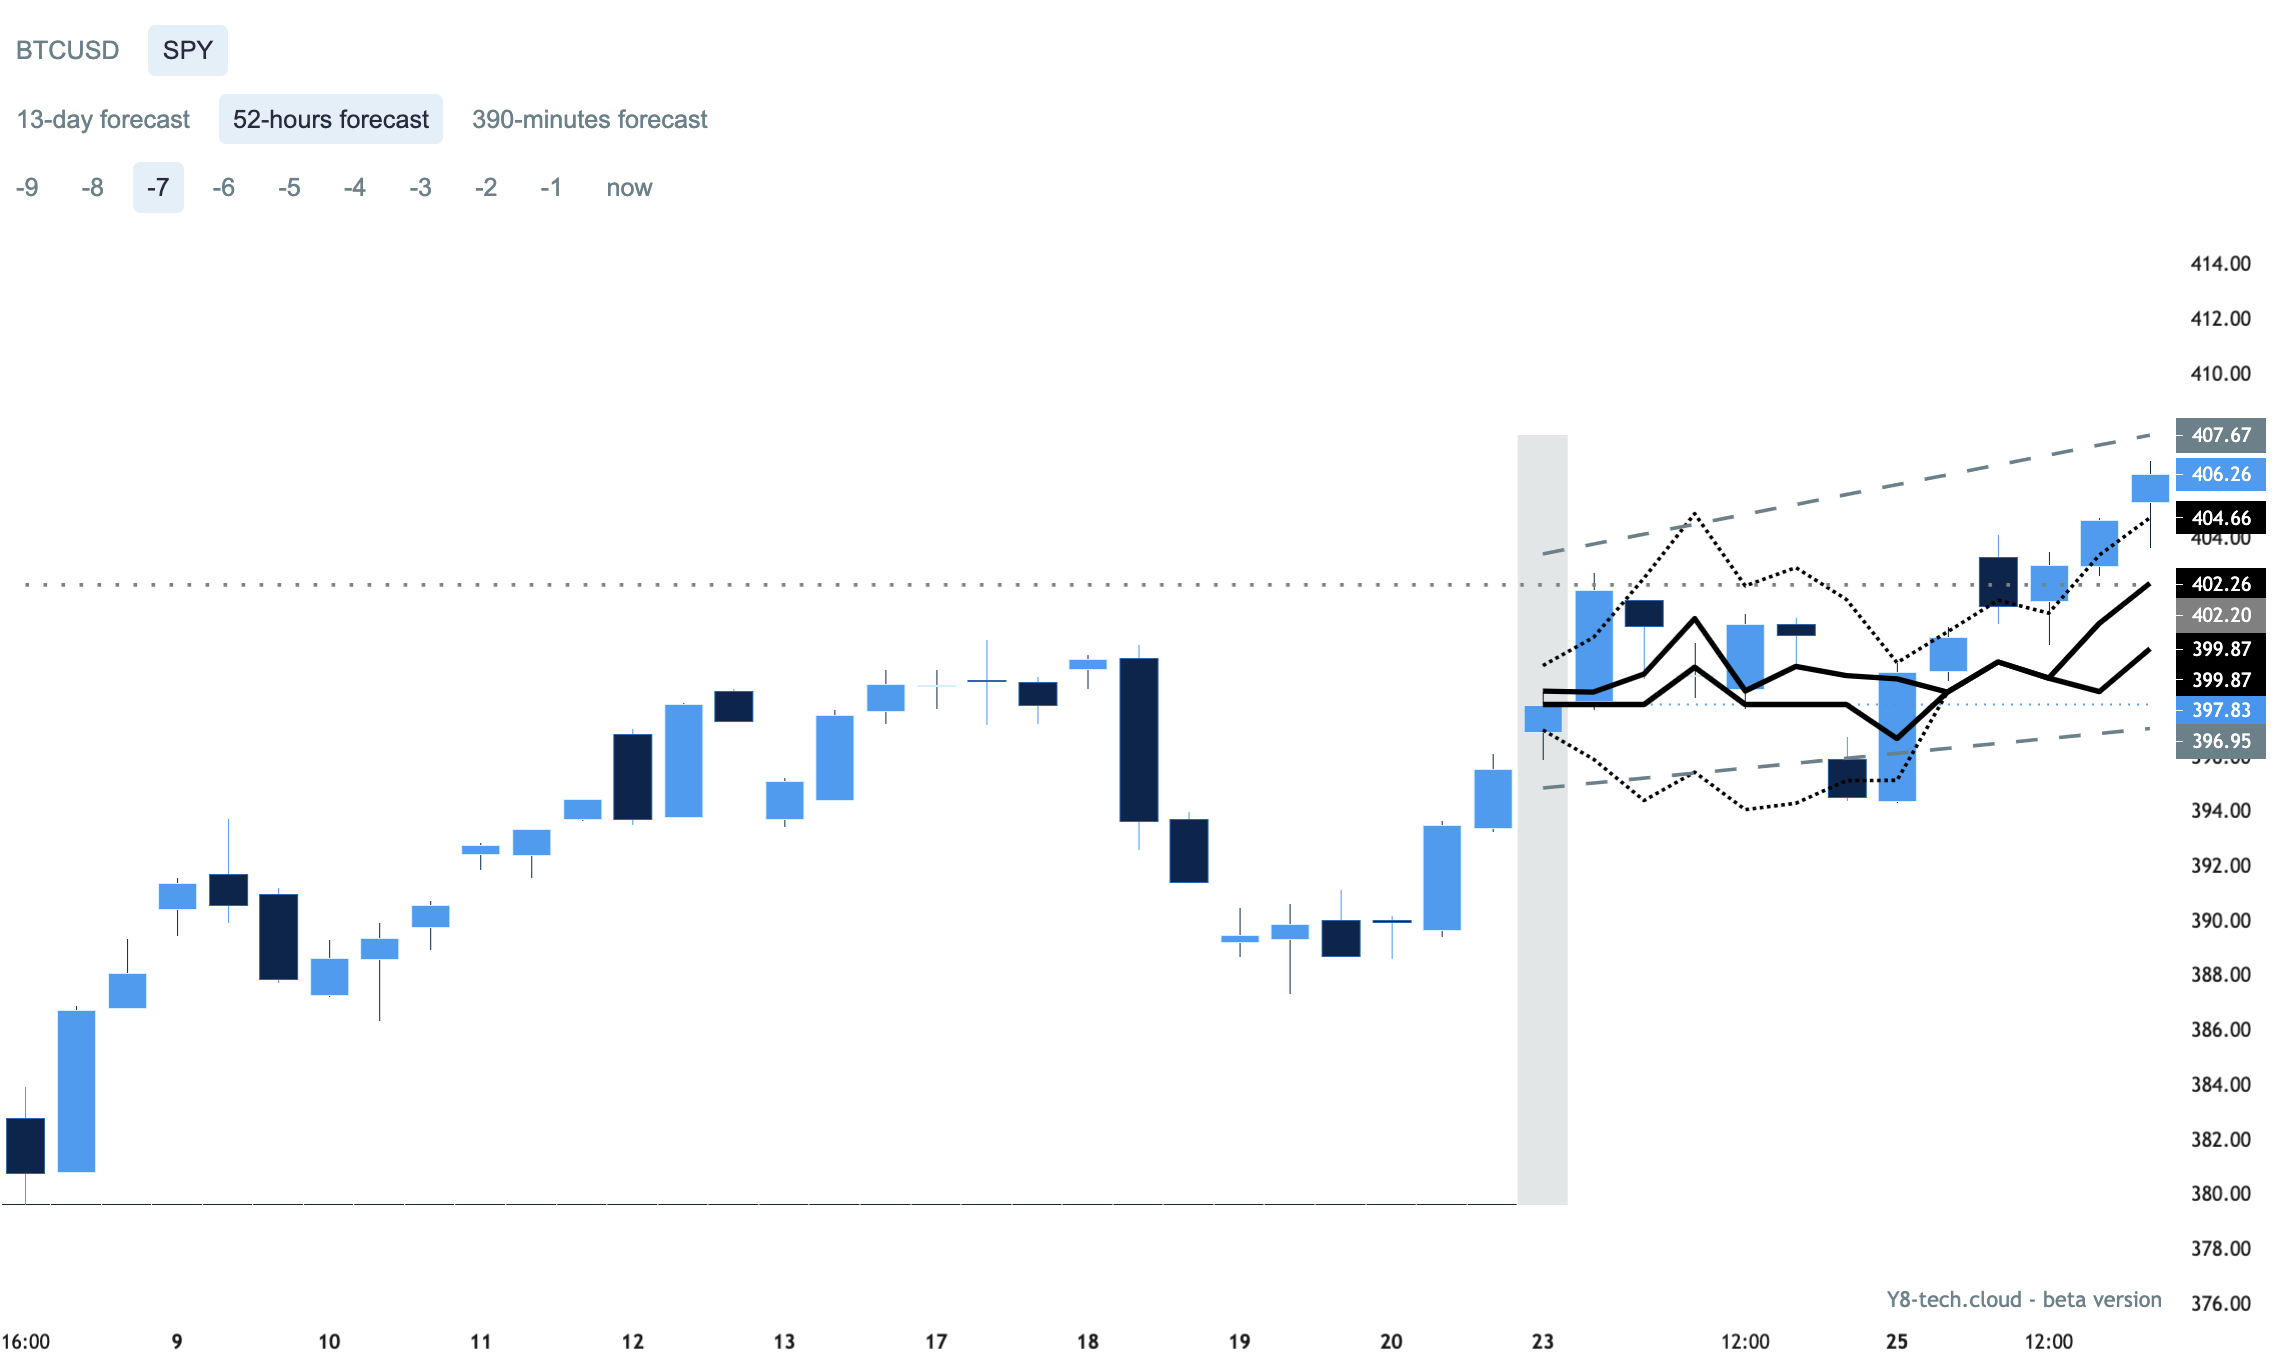



# download & import the latest release

In [1]:
# GIT-CLONE for non Kaggle environments:
!git clone https://github.com/yuce-8/public-api-client.git
import sys
sys.path.insert(0,"public-api-client")
from y8_api_client_lib import Y8_API_CLIENT

Cloning into 'public-api-client'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 104 (delta 57), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 5.64 MiB | 5.70 MiB/s, done.
Resolving deltas: 100% (57/57), done.


# create a new Y8 Client with your ID
for R&D purposes we can use *johndoe* as ID

In [2]:
Y8 = Y8_API_CLIENT('public')

# get the latest forecast
available forecasts are the following combinations:


1.   BTCUSD - 4hour
2.   BTCUSD - 30min
3.   ETHUSD - 4hour



In [3]:
import datetime
import traceback
import pytz
import json
import requests
import time
import concurrent.futures


f_0 = Y8.get_latest_forecast(symbol=Y8_API_CLIENT.BTCUSD, interval=Y8_API_CLIENT.INTERVAL_30MIN)

if not f_0 is None:
    print('success!')
else:
    print('failed')

success!


## analyse the forecast




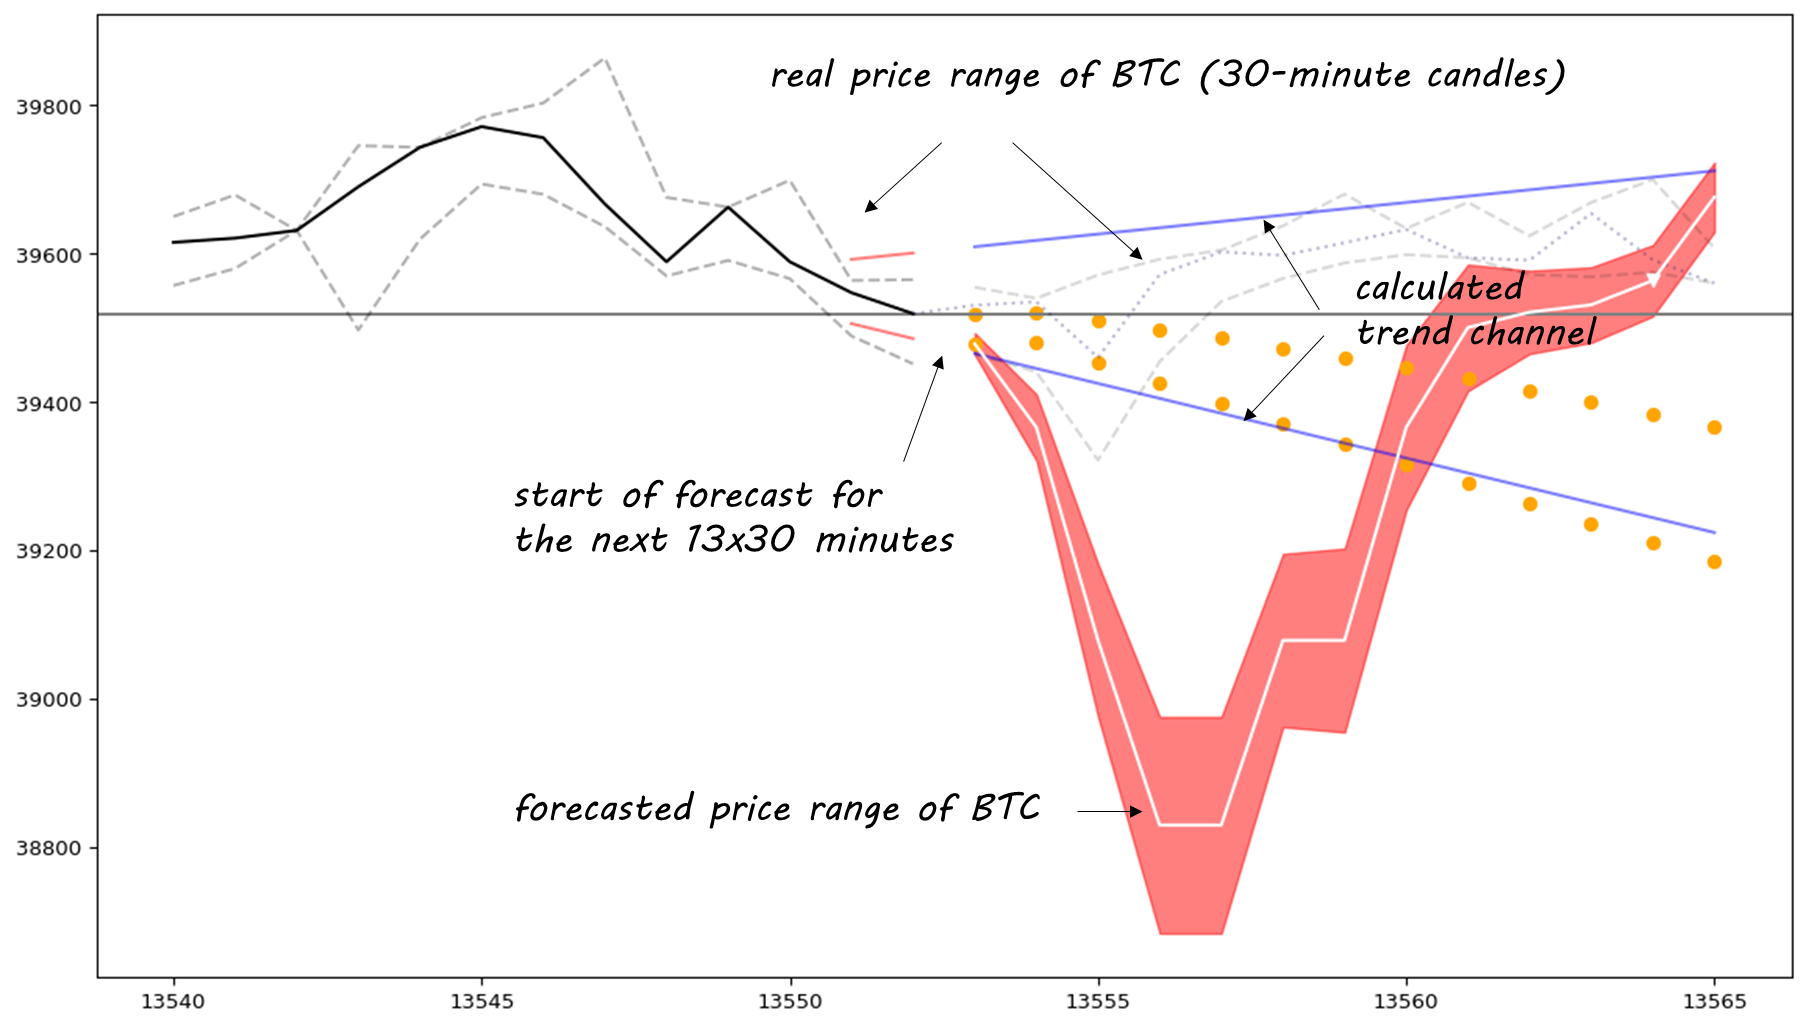


a forecast *f_0* has multiple parameters:


*   **forecast start date**: the date & time of the quote when the forecast was executed
*   **forecast start price**: the price of the quote in USD when the forecast was executed
*   **accuracy of backtesting**: the accuracy of the backtest that was executed for the selected model; level_1 measures the accuracy of positive / negative projections regarding the forecast start price (ie. is it above or below the starting price)
*   **forecasted prices top**: the upper range of the forecasted price projection
*   **forecasted prices bottom**: the lower range of the forecasted price projection
*   **forecasted resistance price**: the forecasted resistance that may have an impact on the price direction
*   **forecasted support price**: the forecasted support that may have an impact on the price direction
*   **calculated trendline #1 & #2**: the latest trends that shaped the price development in the past
*   **confidence top & bottom**: 80% confidence of the up & down price movements of the past 90 quotes projected into the future









In [4]:
accuracy_of_backtesting = f_0['level_1']
forecast_start_date = f_0['last_date']
forecast_start_price = f_0['last_quote']
forecasted_future_prices_top = f_0['quotes_forecast_top_incl_vola']
forecasted_future_prices_bottom = f_0['quotes_forecast_bottom_incl_vola']
forecasted_next_resistance_price = f_0['next_resistance']
forecasted_next_support_price = f_0['next_support']
calculated_trendline_1 = f_0['trendline_extended_1']
calculated_trendline_2 = f_0['trendline_extended_2']
price_confidence_bottom = f_0['confidence_extended_1']
price_confidence_top = f_0['confidence_extended_2']

# output
print('the forecast was executed at ', forecast_start_date, ' when the price was ', forecast_start_price)

print('for the next timesteps the following future price ranges were projected:')
for i in range(0, len(forecasted_future_prices_top)):
  print('\tt +', (i+1), ' ==> ]', round(forecasted_future_prices_bottom[i]), ', ', round(forecasted_future_prices_top[i]), '[')

print('the forecated next resistance price: ', round(forecasted_next_resistance_price))
print('the forecated next support price   : ', round(forecasted_next_support_price))

print('price confidence of the past 90 quotes:')
for i in range(0, len(price_confidence_bottom)):
  print('\tt +', (i+1), ' ==> [', round(price_confidence_bottom[i]), ', ', round(price_confidence_top[i]), ']')

the forecast was executed at  2023-01-31 15:30:00  when the price was  23099.9
for the next timesteps the following future price ranges were projected:
	t + 1  ==> ] 23096 ,  23118 [
	t + 2  ==> ] 23004 ,  23210 [
	t + 3  ==> ] 23015 ,  23211 [
	t + 4  ==> ] 23025 ,  23227 [
	t + 5  ==> ] 23033 ,  23267 [
	t + 6  ==> ] 23053 ,  23331 [
	t + 7  ==> ] 23052 ,  23332 [
	t + 8  ==> ] 23158 ,  23360 [
	t + 9  ==> ] 23157 ,  23360 [
	t + 10  ==> ] 23262 ,  23458 [
	t + 11  ==> ] 23162 ,  23356 [
	t + 12  ==> ] 23268 ,  23451 [
	t + 13  ==> ] 23299 ,  23420 [
the forecated next resistance price:  9999999999
the forecated next support price   :  18160
price confidence of the past 90 quotes:
	t + 1  ==> [ 23085 ,  23105 ]
	t + 2  ==> [ 23085 ,  23105 ]
	t + 3  ==> [ 23075 ,  23103 ]
	t + 4  ==> [ 23067 ,  23100 ]
	t + 5  ==> [ 23058 ,  23097 ]
	t + 6  ==> [ 23048 ,  23091 ]
	t + 7  ==> [ 23038 ,  23086 ]
	t + 8  ==> [ 23028 ,  23081 ]
	t + 9  ==> [ 23019 ,  23075 ]
	t + 10  ==> [ 23011 ,  23071

# visualize the latest forecast

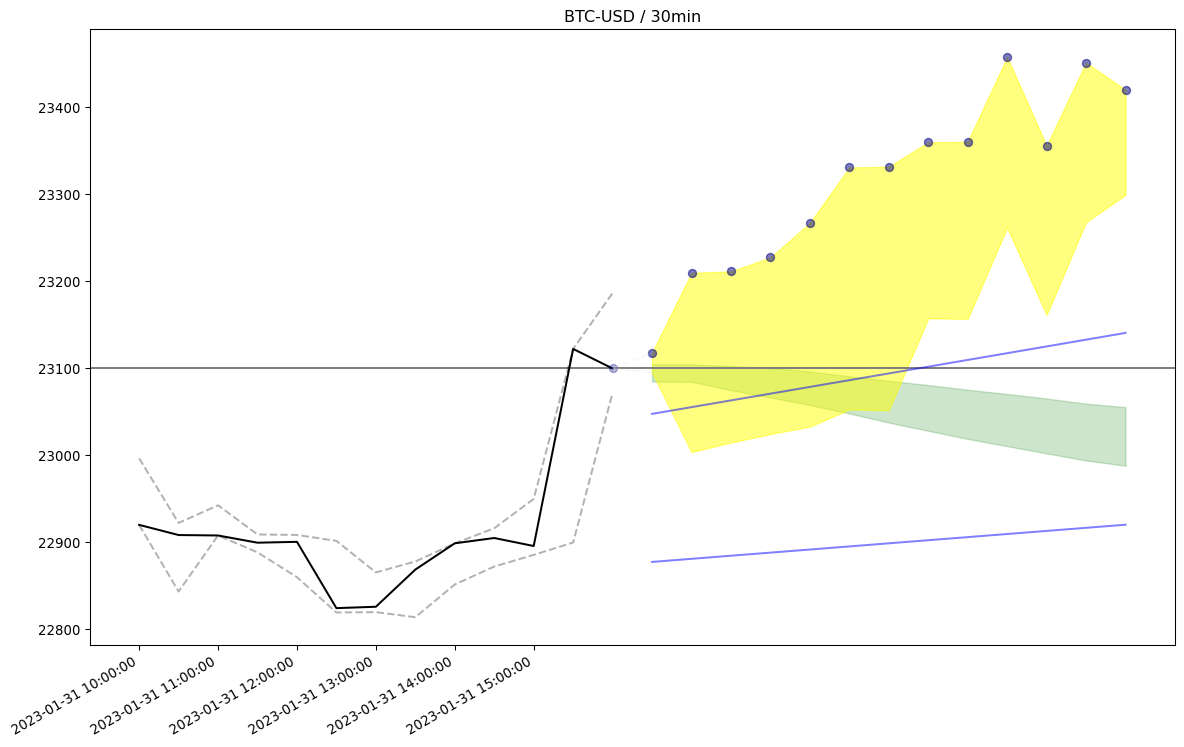

In [5]:
SYMBOL = Y8_API_CLIENT.BTCUSD
INTERVAL = Y8_API_CLIENT.INTERVAL_30MIN


# load the historical quotes:
df = Y8.get_historical_quotes(symbol=SYMBOL, interval=INTERVAL)

# load the lastest forecast:
forecast = Y8.get_latest_forecast(symbol=Y8_API_CLIENT.BTCUSD, interval=Y8_API_CLIENT.INTERVAL_30MIN)


# prepare plot

def plot_forecast(df, forecast):
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import datetime
    import warnings
    warnings.filterwarnings('ignore')
    
    def to_datetime(x):
        x = str(x).replace('T', ' ')
        if len(x) > 19:
          x = x[:19]
        elif len(x) == 10:
          x = x + '00:00:00'
        return datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

    dpi = 96
    width = 1400
    height = 800 # 800
    mpl.rcParams.update(mpl.rcParamsDefault)
    fig = plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    plt.rcParams["axes.grid"] = False
    plt.style.use("seaborn-bright")
    plt.rcParams['axes.facecolor'] = 'white'
    fig.patch.set_facecolor('white')
    future_dates = []  
    all_indizes = []
    fill_colors = ['darkorange', 'mediumspringgreen', 'midnightblue']
    color_counter = -1  
    level_1 = forecast['level_1']
    level_2 = forecast['level_2']
    model_name = forecast['model_name']
    training_date = forecast['training_date']
    last_date_of_forecast = forecast['last_date']
    last_quote_of_forecast = forecast['last_quote']
    forecasted_values = forecast['forecast']
    sl_before, sl_after = forecast['next_support'], forecast['next_resistance'] 
    is_negative = forecast['is_negative']
    confidence_extended_1 = forecast['confidence_extended_1']
    confidence_extended_2 = forecast['confidence_extended_2']
    forecasted_future_prices_top = forecast['quotes_forecast_top_incl_vola']
    forecasted_future_prices_bottom = forecast['quotes_forecast_bottom_incl_vola']

    all_quotes_until_forecast = df.loc[df.Date_ <= last_date_of_forecast]
    all_quotes_after_forecast = df.loc[df.Date_ > last_date_of_forecast]  
    
    history = len(all_quotes_after_forecast)
    all_dates_of_prediction = all_quotes_until_forecast.Date_.values
    true_date_interval = (to_datetime(all_dates_of_prediction[-1]) - to_datetime(all_dates_of_prediction[-2])).total_seconds() // 60
    
    df = df if history == 0 else all_quotes_until_forecast
    if len(all_quotes_after_forecast) > 0:
        true_highs = all_quotes_after_forecast.High.head(len(forecasted_future_prices_top)).values
        true_lows = all_quotes_after_forecast.Low.head(len(forecasted_future_prices_top)).values
        true_closings = all_quotes_after_forecast.Close.head(len(forecasted_future_prices_top)).values
        true_dates = [to_datetime(d) for d in all_quotes_after_forecast.Date_.head(len(forecasted_future_prices_top)).values]
        future_dates = [true_dates[-1] + datetime.timedelta(minutes=true_date_interval * i) for i in range(1, len(forecasted_future_prices_top) + 1)]
        history = 1
    plot_history = len(forecasted_values)
    
    last_quotes = df['Close'].tail(plot_history).values
    last_highs = df['High'].tail(plot_history).values
    last_lows = df['Low'].tail(plot_history).values
    indizes = df['Close'].tail(plot_history).index
    indizes_2 = []

    last_quote = df['Close'].tail(1).values[0]
    indizes_forecast = range(indizes[-1] + 1, indizes[-1]+len(forecasted_values) + 1)
    
    bridge_indizes = [indizes[-1], indizes_forecast[0]]
    bridge_values_1 = [last_quote, forecasted_future_prices_top[0]]
    bridge_values_2 = [last_quote, forecasted_future_prices_bottom[0]]

    
    if history > 0:
        shoting_factor = 0 #if history_size < len(predicted_labels_orig) + 3 else len(predicted_labels_orig) + 5
        last_quotes_2 = true_closings.tolist()
        indizes_2 = list(range(list(indizes_forecast)[0], list(indizes_forecast)[0] + len(true_closings)))
        last_quotes_2.insert(0, last_quote_of_forecast)
        indizes_2.insert(0, indizes[-1])
        last_quotes_2 = last_quotes_2[:plot_history+1]
        indizes_2 = indizes_2[:plot_history+1]
        plt.plot(indizes_2, last_quotes_2, ':', color='midnightblue', label='Real Close', alpha=0.3)
        plt.plot(indizes_2[-1 * len(true_highs):], true_highs, '--', color='black', alpha=0.15)
        plt.plot(indizes_2[-1 * len(true_highs):], true_lows, '--', color='black', alpha=0.15)


    plt.axhline(y=last_quotes[-1], color='grey', linestyle='-')
    plt.plot(indizes, last_quotes, color='black', label='Close')
    plt.plot(indizes, last_lows, '--', alpha=0.3, color='black', label='High')
    plt.plot(indizes, last_highs, '--', alpha=0.3, color='black', label='High')

    
    a = 0.3
    redyellow = 'yellow' if not is_negative else 'red'
    plt.fill_between(indizes_forecast, confidence_extended_1, confidence_extended_2, color='green', alpha=0.2)
    plt.fill_between(indizes_forecast, forecasted_future_prices_top, forecasted_future_prices_bottom, color=redyellow, alpha=0.5)

    plt.plot(indizes[-1], last_quotes[-1], 'bo', label='Forecast', alpha=a, color='navy')
    plt.plot(indizes_forecast, forecasted_future_prices_top, 'bo', label='Forecast', alpha=a, color='navy')
    plt.plot(indizes_forecast, forecasted_future_prices_top, 'bo', label='Forecast', alpha=a, color='navy')
    

    if sl_before != -1 and sl_before > last_quote_of_forecast * 0.9:
        plt.axhline(sl_before, ls=':', color='orange')
    if sl_after != 9999999999 and sl_after < last_quote_of_forecast * 1.1:
        plt.axhline(sl_after, ls=':', color='orange')  
        
    trend_1 = forecast['trendline_extended_1'] # extend_trendline(trend_lines[0], iterations=len(indizes_forecast))
    trend_2 = forecast['trendline_extended_2'] # extend_trendline(
    plt.plot(indizes_forecast, trend_1, color='blue', alpha=0.5)
    plt.plot(indizes_forecast, trend_2, color='blue', alpha=0.5)
      
      

    default_distance = (indizes_forecast[1] - indizes_forecast[0]) // 2
    plt.plot(bridge_indizes, bridge_values_1, '--', color='lavender', alpha=a)
    plt.plot(bridge_indizes, bridge_values_2, '--', color='lavender', alpha=a)
    all_indizes = [*all_indizes, *indizes, *indizes_2]


    
    plt.title(SYMBOL + ' / ' + INTERVAL)
    all_indizes = list(set(all_indizes))[::2]
    
    all_indizes = [*indizes, *indizes_2]
    all_indizes = all_indizes[::2]
      # printd('** all_indizes: ', all_indizes)
    
    last_date_of_forecast = to_datetime(last_date_of_forecast)
    new_future_dates = [last_date_of_forecast + datetime.timedelta(minutes=true_date_interval * i) for i in range(1, len(forecasted_future_prices_top) + 1, 2)]
    date_array = [last_date_of_forecast - datetime.timedelta(minutes=true_date_interval * i) for i in range(len(last_quotes) - 2, 0, -2)] + [last_date_of_forecast] + new_future_dates

    if len(all_indizes) < len(date_array):
        all_indizes = all_indizes[:len(all_indizes)-1]
        date_array = date_array[:len(all_indizes)]
    
    plt.xticks(all_indizes, date_array, rotation=30, ha='right')
    plt.show()

plot_forecast(df, forecast)


# load the historical forecasts and compare them with true price
all forecasts that were created in the past

In [6]:
import requests
import json
import numpy as np

f_0_history = Y8.get_historical_forecasts(symbol=SYMBOL, interval=INTERVAL)

# load the historical quotes:
df = df if not df is None and len(df) > 0 else Y8.get_historical_quotes(symbol=SYMBOL, interval=INTERVAL)

print('there are ', len(f_0_history), ' historical forecasts available:')

for historical_f_0 in reversed(f_0_history[-20:]):
    try:
      h_forecast_start_date = historical_f_0['last_date']
      h_forecast_start_price = round(historical_f_0['last_quote'])
      print('\t historical forecast from ', h_forecast_start_date, ' / ', h_forecast_start_price, ' ==> pattern = ', describe_future_behavior(historical_f_0))
      plot_forecast(df, historical_f_0)
    except:
        pass

there are  100  historical forecasts available:
